<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 4</h2>
<h3 align='center'>Feb 25, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Introduction
In this assignment, an analysis of the least squares method of fitting models to data is done. The Bessel function of the first kind of order one is fit using two models, and the resulting parameters are used to estimate the $\nu$ value of the Bessel function. The accuracies of the two models is compared. The effect of noise and the number of samples on the quality of the fit and the accuracy of the model is also studied. The accuracy of the estimation with change in the range of $x$ values is also studied.


# Part 1
Numpy and matplotlib are imported inline using pylab. The plot size and font size are increased.

In [1]:
# Importing numpy and matplotlib
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Increase figure and font size
rcParams['figure.figsize'] = 12,9
rcParams['font.size'] = 18
rcParams['text.usetex'] = True

## Question (a)
The function $J_1(x)$ is evaluated from $0$ to $20$:

In [3]:
from scipy.special import j1

In [4]:
x = linspace(0,20,41)
j1v = j1(x)
print(j1v)

[ 0.          0.24226846  0.44005059  0.55793651  0.57672481  0.4970941
  0.33905896  0.13737753 -0.06604333 -0.23106043 -0.32757914 -0.34143822
 -0.27668386 -0.1538413  -0.00468282  0.13524843  0.23463635  0.27312196
  0.24531179  0.16126443  0.04347275 -0.07885001 -0.1767853  -0.22837862
 -0.2234471  -0.1654838  -0.07031805  0.03804929  0.13337515  0.19342946
  0.20510404  0.16721318  0.09039718 -0.00576421 -0.09766849 -0.16341997
 -0.18799489 -0.16663364 -0.10570143 -0.02087707  0.06683312]


## Question (b)
A function to create the matrix for the first model is written below:

In [5]:
def modelB(x):
    """
    Two parameter model given by Acos(x)+Bsin(x)
    """
    return stack((cos(x),sin(x))).transpose()

The function is fit using this model below:

In [6]:
def fitJ1(x,model,x0=0,eps=0):
    """
    Fit J1(x) to the given model using least squares,
    taking only x values greater than or equal to x0.
    eps amount of noise is added to the fit.
    """
    x_ = x[where(x>=x0)]
    A = model(x_)
    noise = eps*randn(*shape(x_))
    return lstsq(A,j1(x_)+noise)[0]

In [7]:
A,B = fitJ1(x,modelB)

In [8]:
def get_nu(A,B):
    """
    Find the nu value given the two model parameters
    """
    phase = arccos(A/sqrt(A*A + B*B))
    return (phase-pi/4)*2/pi

In [9]:
print(get_nu(A,B))

0.864132452083


## Question (c)
The second model is defined below:


In [10]:
def modelC(x):
    """
    A more accurate model given by (Acos(x)+Bsin(x))/sqrt(x)
    """
    
    return stack((cos(x)/sqrt(x),sin(x)/sqrt(x))).transpose()

It is used to fit the function below:

In [11]:
A,B =fitJ1(x,modelC,x0=.5)

In [12]:
print(get_nu(A,B))

0.819731054767


The two estimates obtained above are plotted against the true value of $J_1(x)$ below:

In [13]:
x_0=0.5
x_ = x[where(x>x_0)]
c1=fitJ1(x_,modelB)
c2=fitJ1(x_,modelC)

In [14]:
a1=dot(modelB(x_),c1)
a2=dot(modelC(x_),c2)

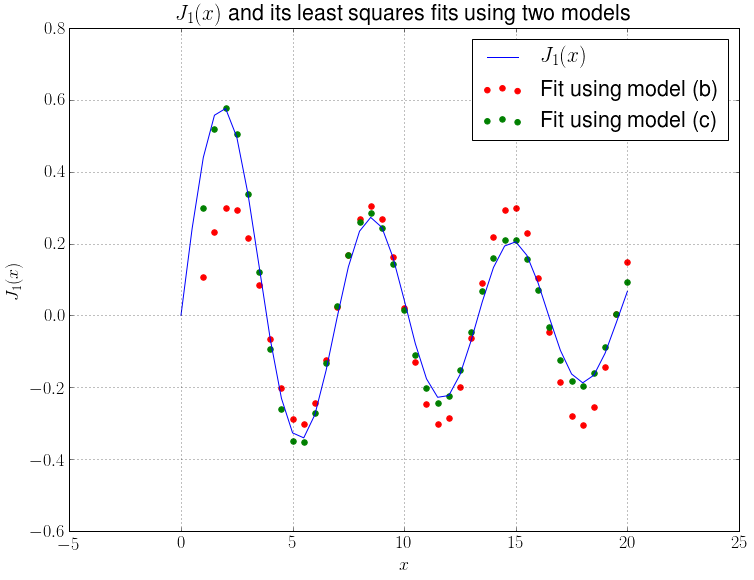

In [15]:
scatter(x_,a1,color='red',s=30)
scatter(x_,a2,color='green',s=30)
plot(x,j1v)

grid()
title(r"$J_1(x)$ and its least squares fits using two models")
xlabel("$x$")
ylabel("$J_1(x)$")
legend(["$J_1(x)$", "Fit using model (b)","Fit using model (c)"])
show()

Clearly, the fit using model (c) is more accurate than the fit using model (b). This is because model (c) accounts for the decaying magnitude of the bessel function but model (b) does not.

## Question (d)
The required function is defined below:

In [16]:
def calc_nu(x,x0,model,eps=0):
    """
    Estimate the nu value for J1(x) using the given model with
    eps amount of noise taking x values greater than or equal to x0.
    """
    A,B = fitJ1(x,model,x0=x0,eps=eps)
    return get_nu(A,B)

## Question (e)
The above function is used to generate the required plots:

In [17]:
nu_b = array([calc_nu(x,x0,modelB) for x0 in x[1:-2]])

In [18]:
nu_c = array([calc_nu(x,x0,modelC) for x0 in x[1:-2]])

In [19]:
nu_c_n = array([calc_nu(x,x0,modelC,eps=1e-2) for x0 in x[1:-2]])

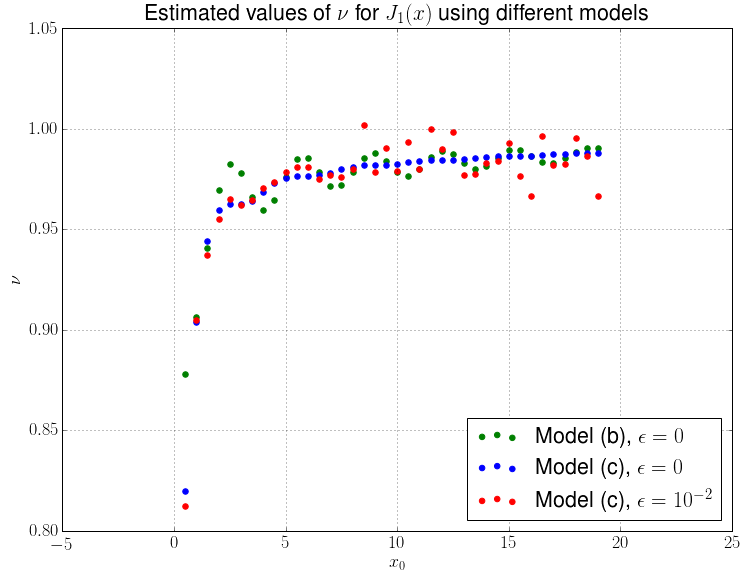

In [20]:
scatter(x[1:-2],nu_b,color='green',s=30)
scatter(x[1:-2],nu_c,color='blue',s=30)
scatter(x[1:-2],nu_c_n,color='red',s=30)

title(r"Estimated values of $\nu$ for $J_1(x)$ using different models")
xlabel("$x_0$")
ylabel(r"$\nu$")
legend([r"Model (b), $\epsilon=0$",r"Model (c), $\epsilon=0$",r"Model (c), $\epsilon=10^{-2}$"]
      ,loc=4)
grid()

## Question (f)
The above analysis is repeated while increasing the number of measurements:

In [21]:
# A list of x vectors with increasing samples
x_s = [linspace(0,20,int(n)) for n in logspace(2,3.5,num=5)]

In [22]:
# Compute all the estimates using list comprehensions
nu_c_sample = array([
    array([
        calc_nu(x,x0,modelC,eps=1e-1) for x0 in x[1:-2]
    ])
    for x in x_s
])

Let us plot the estimates obtained for $\nu$ using different sample sizes and compare the results: 

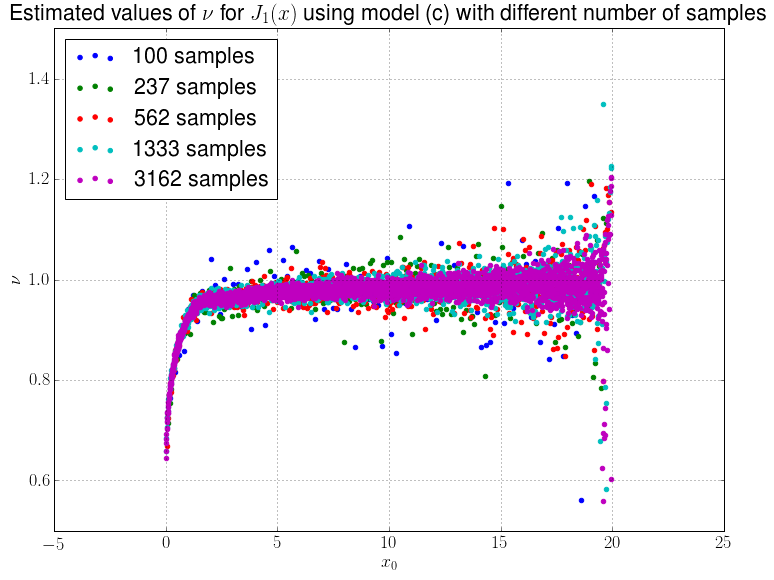

In [23]:
# Compare the estimates
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
ylim(0.5,1.5)
grid()
for i in range(len(x_s)):
    scatter(x_s[i][1:-2],nu_c_sample[i],color=colors[i])
legend(["{} samples".format(len(i)) for i in x_s],loc=2)

title(r"Estimated values of $\nu$ for $J_1(x)$ using model (c) with different number of samples")
xlabel("$x_0$")
ylabel(r"$\nu$")

show()

From the above plot, one can discern that the estimates with more step size seem to be less affected by the noise. But since the scatter plot is very cluttered, the cumulative distribution of the estimated $\nu$ values is plotted as it provides more clear insight into the differences:

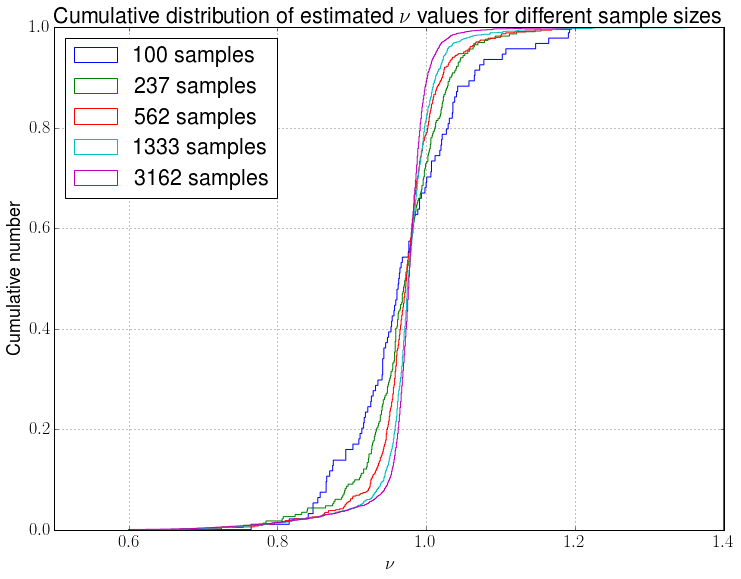

In [24]:
# Plot the cumulative distributions for more insight
figure()
grid()
for i in range(len(x_s)):
    hist(nu_c_sample[i],color=colors[i],normed=True,
         bins=1000,histtype='step',range=(0.6,1.4),cumulative=True)
legend(["{} samples".format(len(i)) for i in x_s],loc=2)

title(r"Cumulative distribution of estimated $\nu$ values for different sample sizes")
xlabel(r"$\nu$")
ylabel("Cumulative number")

show()

The above plot shows that the estimates with higher samples have sharper cumulative distributions, with their inflection points at a value slightly less than $\nu = 1.0$. A sharper cumulative distribution means that the variance of the estimate is lower. In other words, it is less affected by the noise level. Note that these distributions are also shifted due to the effect of increasing accuracy of the $\nu$ estimate with increasing $x$ values. This means that the inflection point estimate need not be the most accurate estimate for $\nu$. However, since this skew affects all the cases equally, the plots can be used to study the effect of noise.  

The distribution plotted above is actually a sum of normal distributions for each value of $x_0$, and the mean of each of these distributions approaches $1$ as $x_0$ gets larger, because model (c) better estimates the Bessel function at larger $x_0$. However, the variances of these distributions increases with increasing $x_0$ as the number of samples for solving with least squares reduces as $x_0$ is increased, leading to a larger impact of noise on the estimate. These variations can be seen in the purple scatter plot of $\nu$ vs $x_0$. The mean of the purple plot gradually increases and approaches $1$, while the thickness of the plot, which is analogous to the variance of the distribution at that $x_0$ gradually increases. 

The averaged distributions plotted above can therefore be used to study the effect of number of samples, as well as amount of noise, on the overall quality of the fit and estimates obtained.

## Question (f)
We shall now vary the amount of noise, keeping the sample size fixed, and study its effect on the estimates. $\epsilon$ is varied from $10^{-2}$ to $10$ and the resulting cumulative distribution plots are seen:

In [25]:
# Compute estimates keeping sample size fixed, but varying noise level
x = x_s[-1] # Fixed around 3100 samples
epss = [0]+list(logspace(-2,1,num=6)) # eps from 1e-2 to 1e1

nu_c_noise = array([
    array([
        calc_nu(x,x0,modelC,eps=e) for x0 in x[1:-2]
    ])
    for e in epss
])

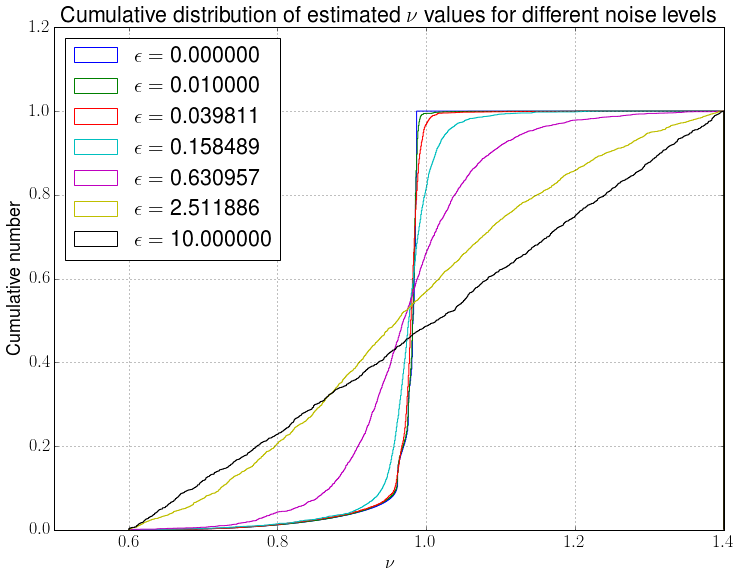

In [26]:
# Plot the cumulative distributions again
figure()
grid()
for i in range(len(epss)):
    hist(nu_c_noise[i],color=colors[i],normed=True,
         bins=1000,histtype='step',range=(0.6,1.4),cumulative=True)
legend(["$\\epsilon = $ {:f}".format(e) for e in epss],loc=2)

title(r"Cumulative distribution of estimated $\nu$ values for different noise levels")
xlabel(r"$\nu$")
ylabel("Cumulative number")

show()

The plots again show a similar trend when sample size was varied. With noise levels of more than $1$, the distribution is basically a uniform distribution, which means that the noise has almost completely drowned out the effect of the Bessel function itself. As the noise level approches lower values, the distribution sharpens. With no noise, the distribution is not perfectly sharp because of the aforementioned reason that this is an averaged distribution which also takes into account the convergence of $\nu$ as $x_0$ increases.

The above exercise is repeated, but now with varying the range of $x_0$ values.

In [27]:
# A list of x vectors with fixed size and different range
xr_s = [linspace(i,i+20,1000) for i in range(0,100,20)]

# Compute estimates using list comprehensions
nu_c_range = array([
    array([
        calc_nu(x,x0,modelC,eps=1e-1) for x0 in x[1:-2]
    ])
    for x in xr_s
])

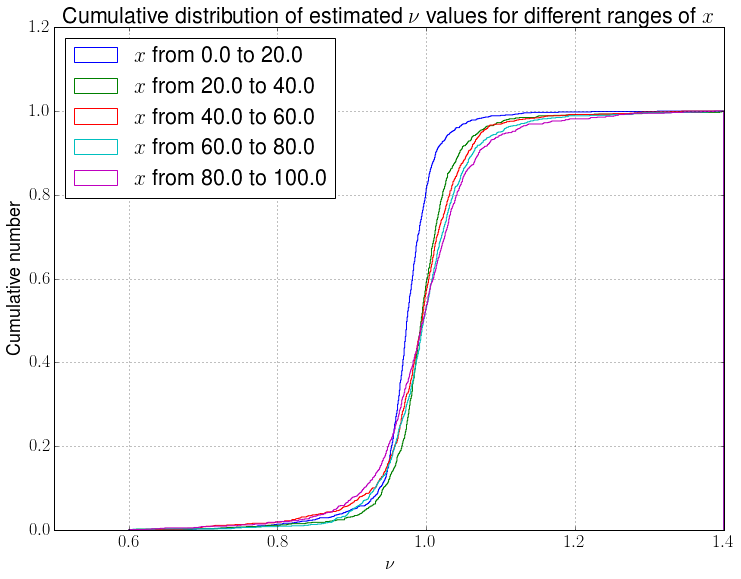

In [28]:
# Plot the cumulative distributions
figure()
grid()
for i in range(len(xr_s)):
    hist(nu_c_range[i],color=colors[i],normed=True,
         bins=1000,histtype='step',range=(0.6,1.4),cumulative=True)
legend(["$x$ from {} to {}".format(x_[0],x_[-1]) for x_ in xr_s],loc=2)

title(r"Cumulative distribution of estimated $\nu$ values for different ranges of $x$")
xlabel(r"$\nu$")
ylabel("Cumulative number")

show()

From the above plots, we see that the inflection point of the distribution approaches $1$ as the range of $x_0$ approches larger values. This is because the model better estimates the Bessel function for larger values of $x_0$.

# Conclusion
From the above study of least squares approximation of Bessel functions, we can conclude the following:

* Of the two models, (b) and (c), model (c) has more accuracy and a higher quality of fit. This is because it takes into account the decaying amplitude of the Bessel function in the amplitude, whereas model (b) does not do so.
* When noise is added, higher values of $x_0$ are more affected by the noise than lower values, because noise has a greater effect when the sample size is less, as is with high $x_0$.
* The effect of noise is reduced by increasing the number of samples.
* The quality of the fit becomes worse with increasing noise levels.
* As the value of $x_0$ increases, the estimated value of $\nu$ approaches the true value of $1$.